# Problem Set 3



Team: 
    Lea Schmierer 3546563;
    Angelina Basova 3704658;
    Daniel Knorr 3727033

## Exercise 1


You can find the solution of this exercise in the zip file as a pdf. 

## Exercise 2

## Exercise 3

In [53]:
from pyspark.sql import SparkSession
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

######################
# 3a)
print("Exercise 3a)")
######################

sparkSession = SparkSession.builder.appName('A3E3').getOrCreate()
sc = sparkSession.sparkContext

# Load and parse the data
data = sc.textFile('./movielens.txt')
ratings = data.map(lambda x: x.split("\t")).map(lambda p: Rating(
    int(p[0]), int(p[1].strip()), float(p[2].strip())))

print("Gesamt: ", ratings.count())

(training, test) = ratings.randomSplit((0.5, 0.5), seed=12345)
print("training: ", training.count())
print("remaining: ", test.count())

Exercise 3a)
Gesamt:  100000
training:  50255
remaining:  49745


In [54]:
######################
# 3b)
print("Exercise 3b)")
######################

# Train the ratings using ALS
rank = 10
iterations = 5
model = ALS.train(ratings, rank, iterations, 0.01)
# Save the model
model.save(sc, "./movielens.model")

Exercise 3b)


22/11/14 14:22:38 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers


In [55]:
######################
# 3c)
print("Exercise 3c)")
######################

# Predict rating if the test data
testdata = ratings.map(lambda p: (p[0], p[1]))
predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), r[2]))
ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1]) ** 2).mean()
print("Mean Squared Error = " + str(MSE))

Exercise 3c)


Mean Squared Error = 0.5127118713514301


## Exercise 4

In [56]:
#a)
try:
    import numpy
except:
    print ("This implementation requires the numpy module.")
    exit(0)


"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T


if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 3

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)

    print('P:')
    print(nP)

    print('Q:')
    print(nQ)

    print("No I don't obtain the same matrices Q and P as shown in the lecture, because I don't have fix numbers. The optimization starts on random numbers.")

    print('R:')
    print(nR)


P:
[[ 0.261289    1.89216881  1.46808015]
 [ 1.70135628  1.85091542 -0.32691825]
 [ 1.44422977  0.0341853   2.11249549]
 [ 0.90724543  2.17360525  0.26640532]
 [ 2.1099333   0.76465554  0.43698719]
 [ 0.68191232  1.1938945   1.51107533]]
Q:
[[ 0.77258096  0.06712556  0.38305972]
 [ 1.30155008  0.24601601  0.99618034]
 [ 1.4791162   1.25320751  0.20960215]
 [ 0.90372702  1.34658136 -0.14594456]
 [ 1.23907188  1.74965147  0.06647052]
 [ 0.08482716  1.65706622  1.23312208]
 [ 1.2915601   1.06383173  0.51328306]
 [ 0.74762578  1.50647292 -0.1517178 ]
 [ 0.9463239   1.53087527  1.23023724]
 [ 0.90696098  0.38432206  0.79012532]
 [ 0.40415361  0.49338997  2.04314887]
 [ 1.84348211  0.28805164  1.65698424]]
No I don't obtain the same matrices Q and P as shown in the lecture, because I don't have fix numbers. The optimization starts on random numbers.
R:
[[0.89124216 2.26805713 3.06546971 2.56983486 3.73197584 4.96793549
  3.10396033 2.82311357 4.95002533 2.12414845 4.03868431 3.45930959]
 [1.

Error:
3.299439112277976
3.2926423256531723
3.285799007925892
3.2789091940793473
3.271972925701534
3.2649902510917546
3.2579612253666173
3.250885910565443
3.243764375755
3.2365966971335025
3.229382958133792
3.2221232495256316
3.2148176695170303
3.207466323854525
3.200069325922337
3.192626796840325
3.1851388655606536
3.17760566896309
3.170027351948857
3.162404067532941
3.1547359769347905
3.147023249667298
3.1392660636239955
3.1314646051643713
3.1236190691972094
3.1157296592618846
3.1077965876075027
3.099820075269812
3.0918003521457855
3.083737657065794
3.0756322378632697
3.06748435144178
3.0592942638394125
3.051062250290391
3.042788595283817
3.034473592619471
3.026117545460557
3.0177207663833223
3.0092835774234583
3.000806310119187
2.9922893055509596
2.9837329143776707
2.9751374968693094
2.9665034229359604
2.9578310721530725
2.949120833782919
2.94037310679216
2.931588299865436
2.922766831414916
2.9139091295857176
2.9050156322571405
2.896086787039625
2.8871230512673804
2.878124891986609


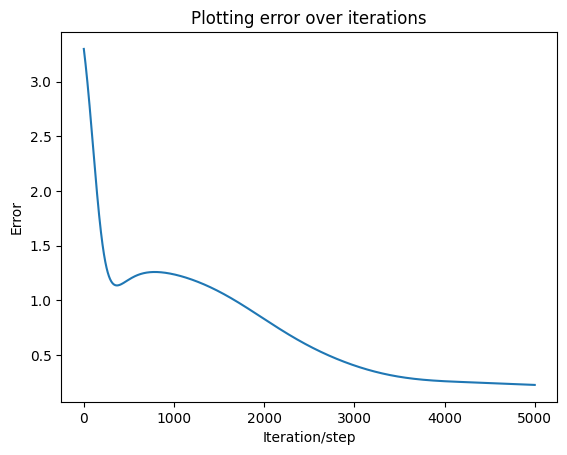

In [57]:
#b)
import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    error=[]
    print('Error:')
    for step in range(steps):
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                
        print(eij)
        error.append(eij)  

        if e < 0.001:
            break

    plt.plot(error)
    plt.ylabel('Error')
    plt.xlabel('Iteration/step')
    plt.title('Plotting error over iterations')
    plt.show()
    return P, Q.T




if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)


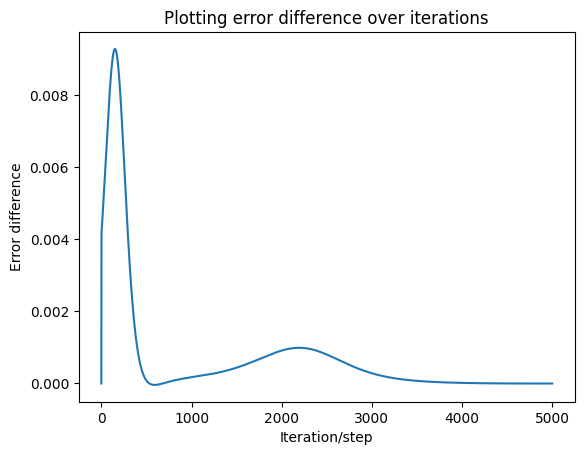

In [58]:
#b)
import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    error=[]
    differences=[]
    for step in range(steps):
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                
        if len(error) == 0:
            errordiff = 0
        else:
            errordiff = error.pop()-eij

        differences.append(errordiff)
        error.append(eij)  

        if e < 0.001:
            break

    plt.plot(differences)
    plt.ylabel('Error difference')
    plt.xlabel('Iteration/step')
    plt.title('Plotting error difference over iterations')
    plt.show()
    return P, Q.T




if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)


## Exercise 5

## Exercise 6 Bonus